In [1]:
pip install pystoi

  Preparing metadata (setup.py) ... done
  Created wheel for pystoi: filename=pystoi-0.3.3-py2.py3-none-any.whl size=7793 sha256=6ffe92e9658405ea3dd46f0a5a1fcf77d9d06ca72dbfbe96f0461b604acbeef3
  Stored in directory: /root/.cache/pip/wheels/3b/ca/9e/5b5d6e5e109322303b50d21918ad2bd7d50a2a0775c11e08e8
Successfully built pystoi
Note: you may need to restart the kernel to use updated packages.


In [2]:
!apt-get install python3-dev -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  javascript-common libexpat1-dev libjs-jquery libjs-sphinxdoc
  libjs-underscore libpython3-dev libpython3.10-dev python3.10-dev
Suggested packages:
  apache2 | lighttpd | httpd
The following NEW packages will be installed:
  javascript-common libexpat1-dev libjs-jquery libjs-sphinxdoc
  libjs-underscore libpython3-dev libpython3.10-dev python3-dev python3.10-dev
0 upgraded, 9 newly installed, 0 to remove and 13 not upgraded.
Need to get 6026 kB of archives.
After this operation, 23.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 javascript-common all 11+nmu1 [5936 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libexpat1-dev amd64 2.4.7-1ubuntu0.2 [147 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libjs-jquery all 3.6.0+dfsg+~3.5.13-1 [321 kB]
Get:4 htt

In [3]:
!git clone https://github.com/vBaiCai/python-pesq.git

Cloning into 'python-pesq'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 121 (delta 13), reused 13 (delta 13), pack-reused 104
Receiving objects: 100% (121/121), 63.69 KiB | 2.27 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [4]:
cd python-pesq

/kaggle/working/python-pesq


In [5]:
pip install https://github.com/vBaiCai/python-pesq/archive/master.zip

     - 43.9 kB 1.9 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pypesq: filename=pypesq-1.2.4-cp310-cp310-linux_x86_64.whl size=35231 sha256=4870ca5aeee0f711c5c0c146efbbafc615f349de55592be29917b4cd8c555e38
  Stored in directory: /tmp/pip-ephem-wheel-cache-doxbwt7r/wheels/a3/a0/1b/59a1da4e9996e52a180426047716624ebe278be211740388e4
Successfully built pypesq
Note: you may need to restart the kernel to use updated packages.


# **Libraries**

In [6]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sg
import os
import sys
import time
import glob
import gc
import h5py
import math
import random
import tensorflow as tf
from tensorflow import config
from tensorflow.keras import backend
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, LeakyReLU, ReLU
from tensorflow.keras.layers import BatchNormalization, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from datetime import datetime
from pypesq import pesq as PESQ
from pystoi import stoi as STOI
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

![](https://speechprocessingbook.aalto.fi/_images/1482949661.png)
# sound signals
pressure variations travelling through the air>> These variations in pressure can be described as waves(sound waves)

# why analog to digital signals?
high resolution >> look at seconds, microseconds , nano ,pico
& same problem in amplitude we have continuous numbers
(require inf.memory) so we transform it to digital signals (disctete values, data points only take finite numbers)

![](https://www.sciencebuddies.org/F0SIcVCx1EXH1YdmU152SeF3K7Y=/650x293/-/https/www.sciencebuddies.org/cdn/Files/12180/10/amplitude-frequency.png)

# **Functions for pre-processing**

![](https://bertoltmusicblog.files.wordpress.com/2020/04/movostereoooo.jpg?w=777)

In [7]:
def pre_processing(data, Fs, down_sample):

    #Transform stereo into monoral
    if data.ndim == 2:
        wavdata = 0.5*data[:, 0] + 0.5*data[:, 1]
    else:
        wavdata = data

    return wavdata, Fs

In [8]:
# calculating STFT-Spectrogram
def get_STFT(folder_path, down_sample, frame_length, frame_shift, num_frames):

    #Initialize list
    x = []

    #Get .wav files as an object
    files = sorted(glob.glob(folder_path + "/*.wav"))
    print("Folder:" + folder_path)

    #For a progress bar
    nfiles = len(files)
    unit = math.floor(nfiles/20)
    bar = "#" + " " * math.floor(nfiles/unit)

    #Repeat every file-name
    for i, file in enumerate(files):
        if i == 2000:
            break
        #Display a progress bar
        print("\rProgress:[{0}] {1}/{2} Processing...".format(bar, i+1, nfiles), end="")
        if i % unit == 0:
            bar = "#" * math.ceil(i/unit) + " " * math.floor((nfiles-i)/unit)
            print("\rProgress:[{0}] {1}/{2} Processing...".format(bar, i+1, nfiles), end="")

        #Read .wav file and get pre-process
        wavdata, Fs = sf.read(file)
        wavdata, Fs = pre_processing(wavdata, Fs, down_sample)

        #Calculate the index of window size and overlap
        FL = round(frame_length * Fs)
        FS = round(frame_shift * Fs)
        OL = FL - FS

        #Execute STFT
        #nperseg >> pecifies the length of each short-time segment or frame in samples
        _, _, dft = sg.stft(wavdata, fs=Fs, window='hann', nperseg=FL, noverlap=OL)
        dft = dft[:-1].T #Remove the last point and get transpose
        spec = np.log10(np.abs(dft))


        #Crop the temporal frames into input size
        num_seg = math.floor(spec.shape[0] / num_frames)
        for j in range(num_seg):
            #Add results to list sequentially
            x.append(spec[int(j*num_frames) : int((j+1)*num_frames), :])

    #Finish the progress bar
    bar = "#" * math.ceil(nfiles/unit)
    print("\rProgress:[{0}] {1}/{2} Completed!   ".format(bar, i+1, nfiles), end="")
    print()

    #Convert into numpy array
    x = np.array(x)

    #Return the result
    return x, Fs

In [9]:
#Function for reading an audio and getting the STFT
def read_evaldata(file_path, down_sample, frame_length, frame_shift, num_frames):

    #Inicialize list
    x = []
    ang_x = []

    #Read .wav file and get pre-process
    wavdata, Fs = sf.read(file_path)
    wavdata, Fs = pre_processing(wavdata, Fs, down_sample)

    #Calculate the index of window size and overlap
    FL = round(frame_length * Fs)
    FS = round(frame_shift * Fs)
    OL = FL - FS

    #Execute STFT
    _, _, dft = sg.stft(wavdata, fs=Fs, window='hann', nperseg=FL, noverlap=OL)
    dft = dft[:-1].T #Remove the last point and get transpose
    #Preserves phase information >> to accurately reconstruct the original audio signal from the modified or processed spectrogram
    ang = np.angle(dft) #Preserve the phase
    spec = np.log10(np.abs(dft))

    #Crop the temporal frames into input size
    num_seg = math.floor(spec.shape[0] / num_frames)
    for j in range(num_seg):
        #Add results to list sequentially
        x.append(spec[int(j*num_frames) : int((j+1)*num_frames), :])
        ang_x.append(ang[int(j*num_frames) : int((j+1)*num_frames), :])

    #Convert into numpy array
    x = np.array(x)
    ang_x = np.array(ang_x)

    return wavdata, Fs, x, ang_x

In [10]:
### Function for reconstructing a waveform ###
def reconstruct_wave(eval_y, ang_x, Fs, frame_length, frame_shift):

    #Construct the spectrogram by concatenating all segments
    Y = np.reshape(eval_y, (-1, eval_y.shape[-1]))
    ang = np.reshape(ang_x, (-1, ang_x.shape[-1]))

    #The Y and arg can be transpose for Tensorflow format
    Y, ang = Y.T, ang.T

    #Restore the magnitude of STFT
    Y = np.power(10, Y)

    #Restrive the phase from original wave
    Y = Y * np.exp(1j*ang)

    #Add the last frequency bin along with frequency axis
    Y = np.append(Y, Y[-1, :][np.newaxis,:], axis=0)

    #Get the inverse STFT
    FL = round(frame_length * Fs)
    FS = round(frame_shift * Fs)
    OL = FL - FS
    _, rec_wav = sg.istft(Y, fs=Fs, window='hann', nperseg=FL, noverlap=OL)

    return rec_wav, Fs

In [11]:
#Function for computing LSD(log-spectral distance) loss
def LSD_loss(y_true, y_pred):
    LSD = backend.mean((y_true - y_pred)**2, axis=2)
    LSD = backend.mean(backend.sqrt(LSD), axis=1)
    return LSD

In [12]:
down_sample = 16000    #Downsampling rate (Hz) [Default]16000
frame_length = 0.032   #STFT window width (second) [Default]0.032
frame_shift = 0.016    #STFT window shift (second) [Default]0.016
num_frames = 16        #The number of frames for an input [Default]16
learn_rate = 1e-4      #Lerning rate for CNN training [Default]1e-4
lr_decay = 0           #Lerning rate is according to "learn_rate*10**(-lr_decay*n_epoch)" [Default]0
batch_size = 16        #Size of batch for CNN training [Default]64
epoch = 30             #The number of iteration for CNN training [Default]30
num_sample = 200        #The number of samples for evaluation [Default]800

In [13]:
#Compute STFT for the mixed source
fpath = "/kaggle/input/audioo/noisy_trainset_28spk_wav/noisy_trainset_28spk_wav"
train_x, Fs = get_STFT(fpath, down_sample, frame_length, frame_shift, num_frames)

#Compute STFT for the separated source
fpath = "/kaggle/input/audioo/clean_trainset_28spk_wav/clean_trainset_28spk_wav"
train_y, Fs = get_STFT(fpath, down_sample, frame_length, frame_shift, num_frames)


Folder:/kaggle/input/audioo/noisy_trainset_28spk_wav/noisy_trainset_28spk_wav
Progress:[                    ] 461/11572 Processing...

/tmp/ipykernel_28/3623335970.py:39: RuntimeWarning: divide by zero encountered in log10
  spec = np.log10(np.abs(dft))


Progress:[#####################] 2001/11572 Completed!   
Folder:/kaggle/input/audioo/clean_trainset_28spk_wav/clean_trainset_28spk_wav
Progress:[#####################] 2001/11572 Completed!   


In [14]:
"""import numpy as np
#Save the training data
np.save('X_train', train_x)
np.save('Y_train', train_y)"""

"import numpy as np\n#Save the training data\nnp.save('X_train', train_x)\nnp.save('Y_train', train_y)"

In [15]:
#Remove segments including -inf entries in train data
idx = np.unique(np.where(train_x == -np.inf)[0])
idx = list(set(range(train_x.shape[0])) - set(idx)) #Remove indices of -inf
train_x = train_x[idx, :, :]
train_y = train_y[idx, :, :]

In [16]:
#Split the input data into a training set and a small test set
test_x = train_x[:1700, :, :]
test_y = train_y[:1700, :, :]
train_x = train_x[1700:, :, :]
train_y = train_y[1700:, :, :]

In [17]:
#Normalization
max_x = np.amax(train_x, axis=None)
min_x = np.amin(train_x, axis=None)
train_x = (train_x - min_x) / (max_x - min_x)
train_y = (train_y - min_x) / (max_x - min_x)
test_x = (test_x - min_x) / (max_x - min_x)
test_y = (test_y - min_x) / (max_x - min_x)

In [18]:
print(max_x)
print(min_x)

-0.2012545434273695
-9.456710045613924


In [19]:
#Add a dimension to input
train_x = train_x[:, :, :, np.newaxis]
train_y = train_y[:, :, :, np.newaxis]
test_x = test_x[:, :, :, np.newaxis]
test_y = test_y[:, :, :, np.newaxis]

#Get the number of row and column in input
row = train_x.shape[1]
column = train_x.shape[2]
print("input_data_shape: " + str(train_x.shape) )

#Define the input size(row, column, dimension)
in_layer = Input(shape=(row, column, 1))

#Construct the U-Net
enc1 = Conv2D(32, kernel_size=(5, 7), strides=(1, 2), padding='same')(in_layer)
enc1 = BatchNormalization()(enc1)
enc1 = LeakyReLU(alpha=0.2)(enc1)

enc2 = Conv2D(64, kernel_size=(5, 7), strides=(1, 2), padding='same')(enc1)
enc2 = BatchNormalization()(enc2)
enc2 = LeakyReLU(alpha=0.2)(enc2)

enc3 = Conv2D(128, kernel_size=(5, 7), strides=(1, 2), padding='same')(enc2)
enc3 = BatchNormalization()(enc3)
enc3 = LeakyReLU(alpha=0.2)(enc3)

enc4 = Conv2D(256, kernel_size=(5, 5), strides=(1, 2), padding='same')(enc3)
enc4 = BatchNormalization()(enc4)
enc4 = LeakyReLU(alpha=0.2)(enc4)

enc5 = Conv2D(256, kernel_size=(5, 5), strides=(2, 2), padding='same')(enc4)
enc5 = BatchNormalization()(enc5)
enc5 = LeakyReLU(alpha=0.2)(enc5)

enc6 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(enc5)
enc6 = BatchNormalization()(enc6)
enc6 = LeakyReLU(alpha=0.2)(enc6)

enc7 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(enc6)
enc7 = BatchNormalization()(enc7)
enc7 = LeakyReLU(alpha=0.2)(enc7)

enc8 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(enc7)
enc8 = BatchNormalization()(enc8)
enc8 = LeakyReLU(alpha=0.2)(enc8)

dec1 = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(enc8)
dec1 = BatchNormalization()(dec1)
dec1 = ReLU()(dec1)
dec1 = Dropout(0.5)(dec1)

dec2 = concatenate([dec1, enc7], axis=-1)
dec2 = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(dec2)
dec2 = BatchNormalization()(dec2)
dec2 = ReLU()(dec2)
dec2 = Dropout(0.5)(dec2)

dec3 = concatenate([dec2, enc6], axis=-1)
dec3 = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(dec3)
dec3 = BatchNormalization()(dec3)
dec3 = ReLU()(dec3)
dec3 = Dropout(0.5)(dec3)

dec4 = concatenate([dec3, enc5], axis=-1)
dec4 = Conv2DTranspose(256, kernel_size=(5, 5), strides=(2, 2), padding='same')(dec4)
dec4 = BatchNormalization()(dec4)
dec4 = ReLU()(dec4)

dec5 = concatenate([dec4, enc4], axis=-1)
dec5 = Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 2), padding='same')(dec5)
dec5 = BatchNormalization()(dec5)
dec5 = ReLU()(dec5)

dec6 = concatenate([dec5, enc3], axis=-1)
dec6 = Conv2DTranspose(64, kernel_size=(5, 7), strides=(1, 2), padding='same')(dec6)
dec6 = BatchNormalization()(dec6)
dec6 = ReLU()(dec6)

dec7 = concatenate([dec6, enc2], axis=-1)
dec7 = Conv2DTranspose(32, kernel_size=(5, 7), strides=(1, 2), padding='same')(dec7)
dec7 = BatchNormalization()(dec7)
dec7 = ReLU()(dec7)

dec8 = concatenate([dec7, enc1], axis=-1)
dec8 = Conv2DTranspose(1, kernel_size=(5, 7), strides=(1, 2), padding='same', activation='sigmoid')(dec8)

#Construct the model and display summary
model = Model(in_layer, dec8)

#print(model.summary())

input_data_shape: (21365, 16, 768, 1)


In [20]:
# Learning rate scheduling function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
opt = Adam(lr=learn_rate, beta_1=0.5, beta_2=0.9)

#Compile the model (calling LSD_loss function)
model.compile(loss=LSD_loss, optimizer=opt)
# Define the learning rate scheduler callback
scheduler_callback = LearningRateScheduler(scheduler)
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Fit the model with learning rate scheduler and early stopping
hist = model.fit(train_x, train_y, batch_size=batch_size, epochs=50,
                 validation_data=(test_x, test_y),
                 callbacks=[scheduler_callback, early_stopping],
                 verbose=1)

Epoch 1/50


2023-09-03 15:04:50.366694: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1336/1336 [==============================] - 260s 179ms/step - loss: 0.0540 - val_loss: 0.0882 - lr: 0.0010
Epoch 2/50
1336/1336 [==============================] - 243s 182ms/step - loss: 0.0470 - val_loss: 0.0511 - lr: 0.0010
Epoch 3/50
1336/1336 [==============================] - 238s 178ms/step - loss: 0.0445 - val_loss: 0.0601 - lr: 0.0010
Epoch 4/50
1336/1336 [==============================] - 238s 178ms/step - loss: 0.0431 - val_loss: 0.0586 - lr: 0.0010
Epoch 5/50
1336/1336 [==============================] - 238s 179ms/step - loss: 0.0421 - val_loss: 0.0516 - lr: 0.0010
Epoch 6/50
1336/1336 [==============================] - 238s 178ms/step - loss: 0.0413 - val_loss: 0.0498 - lr: 0.0010
Epoch 7/50
1336/1336 [==============================] - 243s 182ms/step - loss: 0.0407 - val_loss: 0.0509 - lr: 0.0010
Epoch 8/50
1336/1336 [==============================] - 239s 179ms/step - loss: 0.0401 - val_loss: 0.0428 - lr: 0.0010
Epoch 9/50
1336/1336 [==============================] - 238

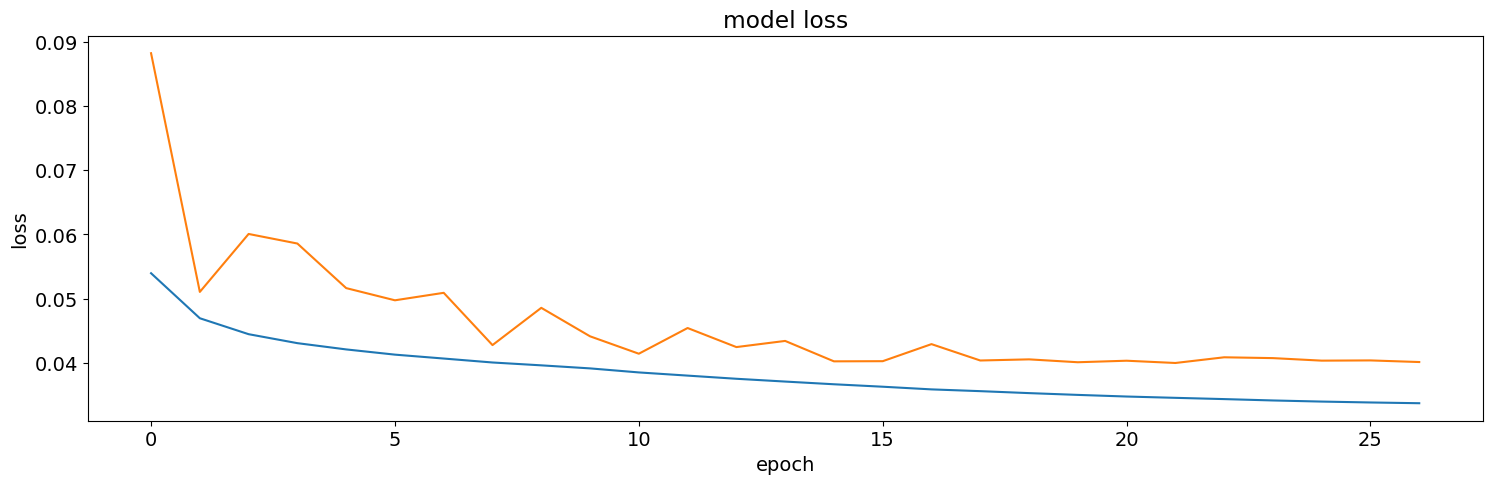

In [21]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(18, 5))
plt.plot(hist.history['loss'], label="loss for training")
plt.plot(hist.history['val_loss'], label="loss for validation")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [22]:
def UNet_evaluation(eval_x):

    #Add a color dimension to input (for Tensorflow format)
    x = eval_x[:, :, :, np.newaxis]

    #Get the separated source for evaluation data
    y = model.predict(x)

    #Remove a color dimension from input (for Tensorflow format)
    eval_y = y[:,:,:,0]

    return eval_y

In [23]:
fileTestNoisy = '/kaggle/input/audioo/noisy_testset_wav/noisy_testset_wav/p232_232.wav'
fileTestClean = '/kaggle/input/audioo/clean_testset_wav/clean_testset_wav/p232_232.wav'

mix_wav, Fs, eval_x, ang_x = read_evaldata(fileTestNoisy, down_sample, frame_length, frame_shift, num_frames)

#Normalization
max_x = -0.2012536819610933 #from prev
min_x = -9.188868273733446 #from prev
eval_x = (eval_x - min_x) / (max_x - min_x)

eval_y = UNet_evaluation(eval_x)

eval_y = eval_y * (max_x - min_x) + min_x

#Reconstructing the waveform
#Denoising
deno_wav, Fs = reconstruct_wave(eval_y, ang_x, Fs, frame_length, frame_shift)

#Read noisy
noisy_wav, Fs = sf.read(fileTestNoisy)
#noisy_wav, Fs = pre_processing(clean_wav, Fs, down_sample)

#Read the ground truth
clean_wav, Fs = sf.read(fileTestClean)
#clean_wav, Fs = pre_processing(clean_wav, Fs, down_sample)

1/1 [==============================] - 0s 411ms/step


noisy_wav


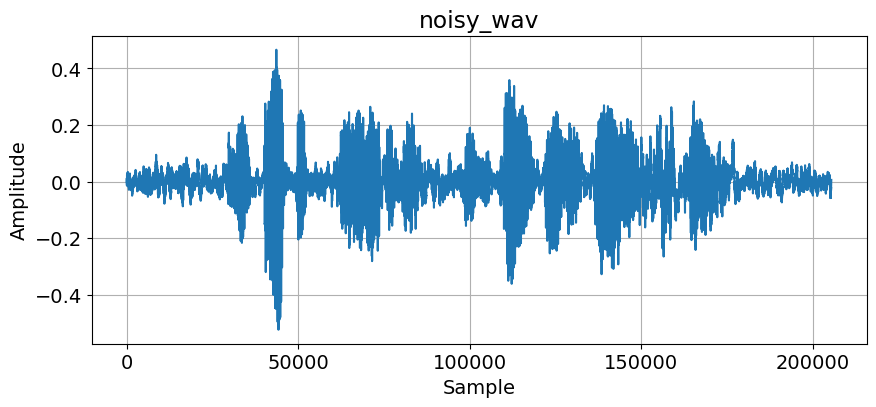

In [24]:
print("noisy_wav")

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(noisy_wav)
plt.title('noisy_wav')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [25]:
from IPython.display import Audio
display(Audio(fileTestNoisy))

clean_wav


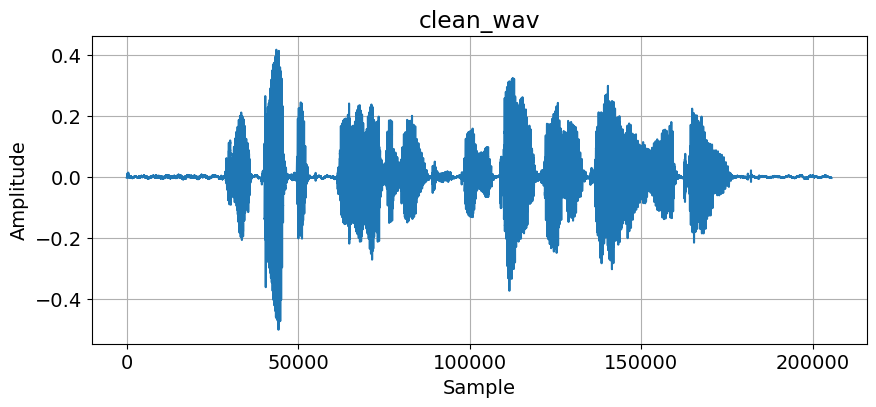

In [26]:
print("clean_wav")

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(clean_wav)
plt.title('clean_wav')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [27]:
from IPython.display import Audio
display(Audio(fileTestClean))

In [35]:
len(clean_wav)

205440

denoi_wav


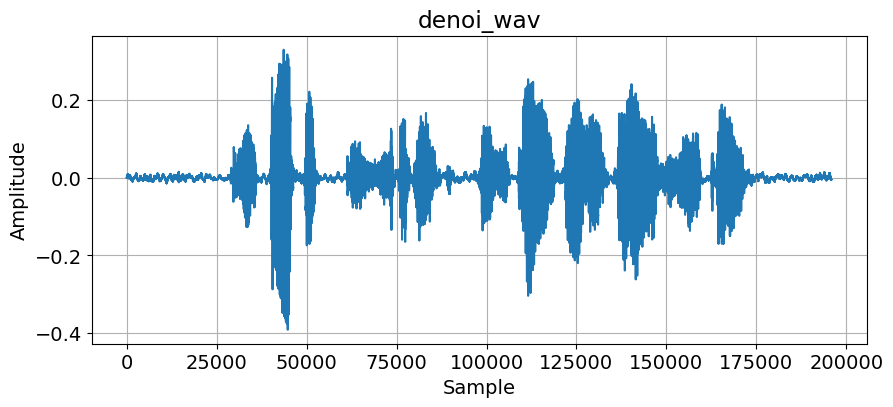

In [37]:
print("denoi_wav")

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(deno_wav)
plt.title('denoi_wav')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [38]:
import soundfile as sf

output_file = '/kaggle/working/output_file2.wav'
sf.write(output_file, clean_wav, Fs)

In [39]:
from IPython.display import Audio
display(Audio(output_file))

In [42]:
len(deno_wav)

195840

Text(0.5, 1.0, 'denoised audio')

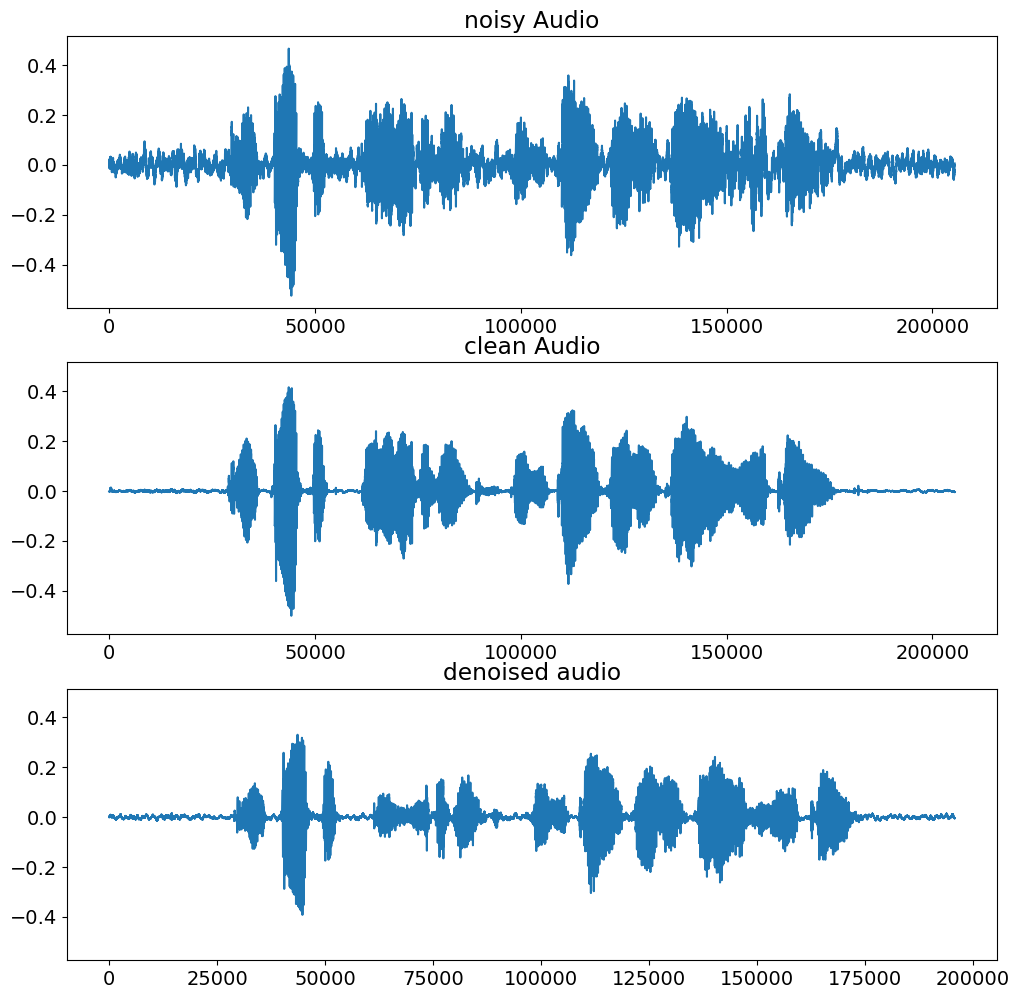

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(12, 12), sharey=True)

ax1.plot(noisy_wav)
ax1.set_title("noisy Audio")

ax2.plot(clean_wav)
ax2.set_title("clean Audio")

ax3.plot(deno_wav)
ax3.set_title("denoised audio")

In [43]:
import numpy as np


max_length = max(len(clean_wav), len(deno_wav))

# Pad the shorter signal with zeros if needed
if len(clean_wav) < max_length:
    clean_wav = np.pad(clean_wav, (0, max_length - len(clean_wav)), 'constant')
elif len(deno_wav) < max_length:
    deno_wav = np.pad(deno_wav, (0, max_length - len(deno_wav)), 'constant')

# Ensure both audio signals are 1D arrays
clean_wav = clean_wav.ravel()
deno_wav = deno_wav.ravel()

print("Length of cleanAudio:", len(clean_wav))
print("Length of denoisedAudioFullyConvolutional:", len(deno_wav))

Length of cleanAudio: 205440
Length of denoisedAudioFullyConvolutional: 205440


In [44]:
import numpy as np
from pystoi import stoi
from scipy.signal import resample


# Resample both audio signals to a common sample rate (e.g., 16000 Hz)
common_sample_rate = 16000
clean_wav = resample(clean_wav, int(len(clean_wav) * common_sample_rate / fs))
deno_wav = resample(deno_wav, int(len(deno_wav) * common_sample_rate / fs))

# Calculate the STOI score
stoi_score = stoi(clean_wav, deno_wav, common_sample_rate, extended=False)

print("STOI Score:", stoi_score)

STOI Score: 0.7625957124510994
